<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/05-kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Algoritmo k-Nearest Neighbors
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de clasificación k-Nearest Neighbors (kNN) para predecir la clase de un conjunto de datos y también para predecir valores numéricos.

Los paquetes necesarios son:

In [47]:
# Paquetes necesarios
import pandas as pd  # Manejo de datos
import matplotlib.pyplot as plt  # Visualización
import numpy as np  # Operaciones numéricas
from sklearn.preprocessing import StandardScaler  # Estandarización de datos
from sklearn.datasets import make_blobs # Dataset
from sklearn.model_selection import train_test_split # División de datos
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score # Métrica de evaluación
# Algoritmo k-NN
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

---
## <font color='264CC7'> Clasificación </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

,num_links,num_words,has_offer,sender_score,all_caps,is_spam
0,3,98,1,0.718607,0,0
1,0,170,0,0.698901,1,0
2,0,38,0,0.620466,0,0
3,0,116,0,0.701755,0,0
4,3,89,1,0.583621,1,1
...,...,...,...,...,...,...
19995,1,22,1,0.614551,0,0
19996,3,154,0,1.000000,1,1
19997,4,109,0,0.935848,1,0
19998,2,197,0,0.481772,0,0


Esta es la cantida de NA que existe: 
 num_links       0
num_words       0
has_offer       0
sender_score    0
all_caps        0
is_spam         0
dtype: int64
Esta es la estadística descriptiva de los datos: 



,num_links,num_words,has_offer,sender_score,all_caps,is_spam
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,1.497300,109.506150,0.302750,0.694248,0.097800,0.09175
std,1.220478,51.969579,0.459459,0.188312,0.297051,0.28868
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,64.000000,0.000000,0.567073,0.000000,0.00000
50%,1.000000,110.000000,0.000000,0.699740,0.000000,0.00000
75%,2.000000,154.000000,1.000000,0.834083,0.000000,0.00000
max,9.000000,199.000000,1.000000,1.000000,1.000000,1.00000


<Axes: >

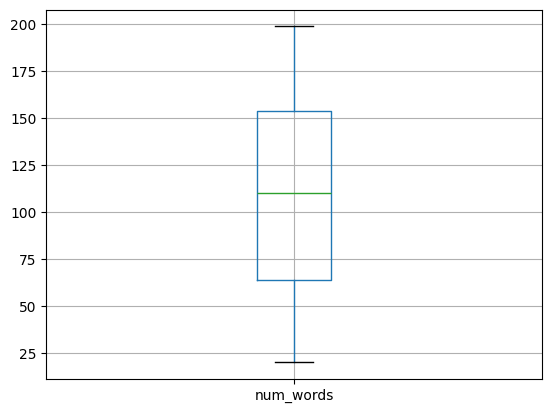

In [48]:
url = "https://raw.githubusercontent.com/Johnny-W-05/Aprendizaje-Automatico/main/dataset/spam_detection_dataset.csv"
df = pd.read_csv(url) #Cargamos los datos
display(df) #Mostramos los datos
#Revisamos si existen na:
print("Esta es la cantida de NA que existe: \n", df.isna().sum())#No tiene NA´s
#Mostramos con estáadística descriptiva los datos
print("Esta es la estadística descriptiva de los datos: \n")
display(df.describe())
#Revisamos con una caja los datos que aparentan más desviación (num_words y num_links)
df.boxplot('num_words')

<Axes: >

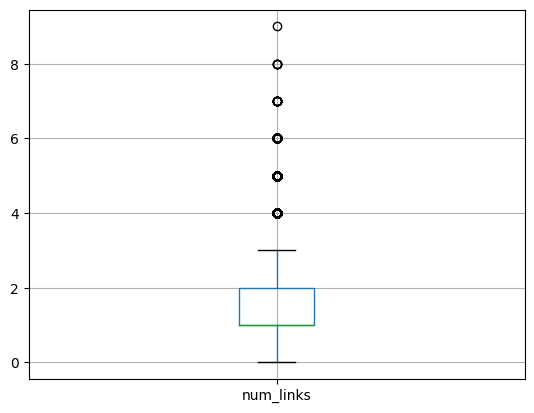

In [49]:
df.boxplot('num_links')

En número de links como se explicó en anteriores trabajos no se consideraran como outliers puesto que cappear el número de links se considera como quitar importancia a estos valores que sí son significativos.

<Axes: xlabel='is_spam'>

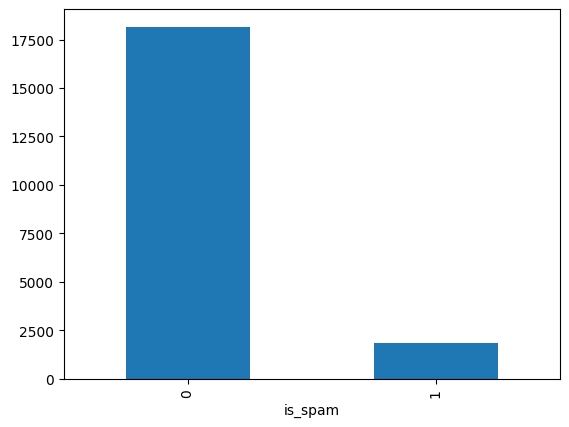

In [50]:
#Y por último de la variable objetivo de este dataset que es is_spam hacemos un barplot por ser categórica
df.is_spam.value_counts().plot(kind='bar')
#Vemos que su distribución es casi todos como no spam y solo algunos como spam.

Dado que knn es un método que si usa distancias para identificar a los vecinos, entonces el escalado es importante en los datos y por eso usaremos el escalado:

In [51]:
#Escalamos todos los datos excepto la variable objetivo (is_spam)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('is_spam', axis=1))
#volvemos a hacerle un dataframe con los datos escalados y juntando is_spam
df_scaled = pd.DataFrame(df_scaled, columns=df.columns[:-1])
df_scaled['is_spam'] = df['is_spam']
#finalmente, dividimos en x y y estos valores
X = df_scaled.drop('is_spam', axis=1)
y = df_scaled['is_spam']


### <font color='264CC7'> Determinación del valor de k </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el número óptimo de k para el algoritmo kNN:
<ul>
  <li>Genera una gráfica que muestre el valor de k vs la precisión del modelo.</li>
  <li>Selecciona el valor de k que maximice la precisión.</li>
</ul>
</div>


In [52]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

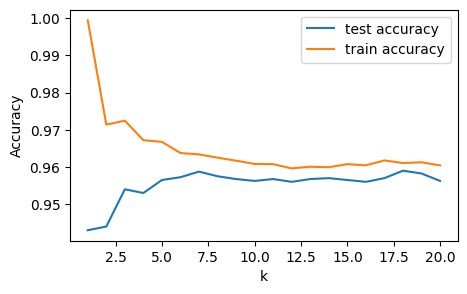

In [53]:
# Crear y entrenar el modelo kNN con algunos valores k
k_values = range(1, 21)
precisions_test = []
precisions_train = []

for k in k_values:
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(X_train, y_train)
    y_pred_test = modelo.predict(X_test)
    y_pred_train = modelo.predict(X_train)
    precisions_test.append(accuracy_score(y_test, y_pred_test))
    precisions_train.append(accuracy_score(y_train, y_pred_train))

# Visualizar la precisión en función de k
plt.figure(figsize=(5, 3))
plt.plot(k_values, precisions_test, label="test accuracy")
plt.plot(k_values, precisions_train, label="train accuracy")
plt.ylabel("Accuracy")
plt.xlabel("k")
plt.legend()
plt.show()

De acuerdo al gráfico obtenido, los valores de k que maximizan la precisión en train y test y acercan ambos valores es en $k = 18$. Por lo tanto se usará ese k


### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo con el valor de k seleccionado.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Genera una matriz de confusión y muestra las métricas de evaluación.</li>
</ul>
</div>

In [54]:
#Entrenamos con el valor k seleccionado
modelo = KNeighborsClassifier(n_neighbors=18)
modelo.fit(X_train, y_train)
# Realizamos predicciones y evaluamos el modelo
y_pred = modelo.predict(X_test)
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Matriz de confusión:
[[3574   57]
 [ 107  262]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3631
           1       0.82      0.71      0.76       369

    accuracy                           0.96      4000
   macro avg       0.90      0.85      0.87      4000
weighted avg       0.96      0.96      0.96      4000



---
## <font color='264CC7'> Regresión </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [55]:
#Como en la clase anterior se uso datasets de variables objetivo categóricas y mi dataset es igual, se pidio a ChatGPT que genere un dataset simulado de un caso regresivo (precio de viviendas)
np.random.seed(42)
n = 200

# Variables predictoras
size_m2 = np.random.normal(100, 30, n)
distance_center = np.random.uniform(0.5, 20, n)
rooms = np.random.randint(1, 6, n)

# Precio base realista
base_price = 30000

price = (
    base_price
    + 600 * size_m2
    - 2500 * distance_center
    + 12000 * rooms
    + np.random.normal(0, 10000, n)
)

# Forzar precios positivos
price = np.maximum(price, 20000)

df = pd.DataFrame({
    "size_m2": size_m2,
    "distance_center_km": distance_center,
    "rooms": rooms,
    "price": price
})

display(df.head())

,size_m2,distance_center_km,rooms,price
0,114.901425,17.608775,1,68700.201755
1,95.852071,14.944988,4,98505.127062
2,119.430656,14.091807,1,86425.788538
3,145.690896,14.198440,1,94608.493435
4,92.975399,7.510077,1,86697.320554


In [56]:
#Se hace la descripcion
df.describe()

,size_m2,distance_center_km,rooms,price
count,200.000000,200.000000,200.000000,200.000000
mean,98.776871,10.178328,2.970000,100185.307784
std,27.930117,5.783456,1.486658,30433.634213
min,21.407647,0.711334,1.000000,20000.000000
25%,78.846170,5.367491,2.000000,81591.220533
50%,99.874243,10.519517,3.000000,101124.332182
75%,115.025574,15.176196,4.000000,122233.119881
max,181.605075,19.814850,5.000000,186363.281857


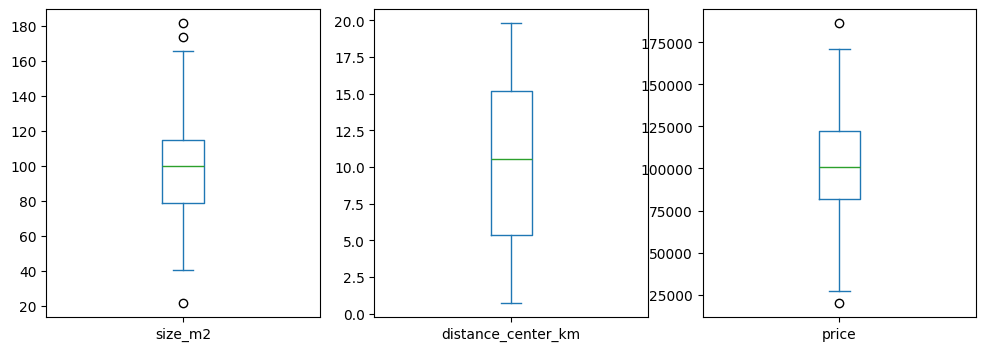

In [57]:
#Mostramos en forma de boxplot size_m2, distance_center_km y price
df[['size_m2', 'distance_center_km', 'price']].plot(
    kind='box',
    subplots=True,
    layout=(1, 3),
    figsize=(12, 4),
    sharey=False
)
plt.show()


Los datos, al tener escalas distintas, debemos escalarlos.

In [58]:
#Escalamos sin price y después lo incluimos
df_scaled = df.drop('price', axis=1)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_scaled)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns[:-1])
df_scaled['price'] = df['price']
display(df_scaled.head())

,size_m2,distance_center_km,rooms,price
0,0.578767,1.288000,-1.328445,68700.201755
1,-0.104981,0.826257,0.694568,98505.127062
2,0.741336,0.678366,-1.328445,86425.788538
3,1.683908,0.696850,-1.328445,94608.493435
4,-0.208235,-0.462517,-1.328445,86697.320554



### <font color='264CC7'> Determinación del valor de k </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el número óptimo de k para el algoritmo kNN:
<ul>
  <li>Genera una gráfica que muestre el valor de k vs la precisión del modelo.</li>
  <li>Selecciona el valor de k que maximice la precisión.</li>
</ul>
</div>


In [59]:
#Dividimos la data en x y y
X = df_scaled.drop('price', axis=1)
y = df_scaled['price']

In [60]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

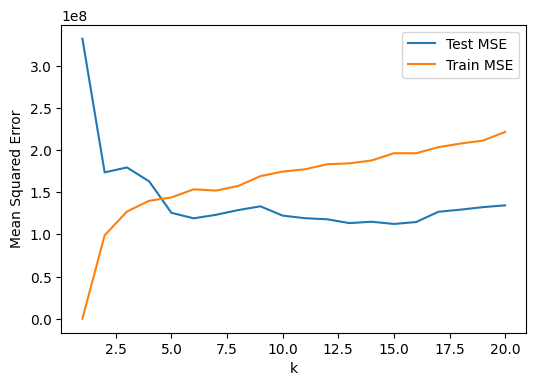

In [61]:
#COmo ya no es clasificacion, cambiamos el método a gNeighborsRegressor y las métricas para regresión.
k_values = range(1, 21)
mse_test = []
mse_train = []

for k in k_values:
    modelo = KNeighborsRegressor(n_neighbors=k)
    modelo.fit(X_train, y_train)

    y_pred_test = modelo.predict(X_test)
    y_pred_train = modelo.predict(X_train)

    mse_test.append(mean_squared_error(y_test, y_pred_test))
    mse_train.append(mean_squared_error(y_train, y_pred_train))

# Visualizar error vs k
plt.figure(figsize=(6, 4))
plt.plot(k_values, mse_test, label="Test MSE")
plt.plot(k_values, mse_train, label="Train MSE")
plt.xlabel("k")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()

De acuerdo al gráfico, parece que el mejor punto donde se maximiza la precisión del modelo es en $k = 9$.


### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo con el valor de k seleccionado.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Calcula el error cuadrático medio.</li>
</ul>
</div>

In [62]:
#Entrenamos y evaluamos
modelo = KNeighborsRegressor(n_neighbors=9)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)

Error cuadrático medio (MSE): 133313487.46089773


En un principio parece que el MSE es muy alto, incluso para el precio de la casa como variable objetivo.